In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

### Fetching Data

In [6]:
X = pd.read_csv("Training Data\\Logistic_X_Train.csv")
Y = pd.read_csv("Training Data\\Logistic_Y_Train.csv")

X = X.values
Y = Y.values

print(X.shape)
print(Y.shape)

(3000, 3)
(3000, 1)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print(X_train[:5, :])
print(Y_train[:5, :])

[[-1.2730991   0.54458745 -1.30570321]
 [ 0.47382474 -0.48399687  1.00318436]
 [ 0.2332593   0.01487102  1.13754079]
 [-0.37748828  1.41959998 -1.40013702]
 [ 1.01560493  0.60231862  1.2854415 ]]
[[1]
 [0]
 [0]
 [1]
 [0]]


### Data Normalization

In [15]:
u = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train - u) / std
X_test = (X_test - u) / std

print(X_train[ : 5, :])

[[-0.95879636 -0.44562665 -1.0927486 ]
 [ 0.36458286 -1.4575796   0.82223715]
 [ 0.18234292 -0.96677799  0.93367205]
 [-0.28032788  0.41523763 -1.17107177]
 [ 0.77500753 -0.38882895  1.05634054]]


### Data Visulaisation

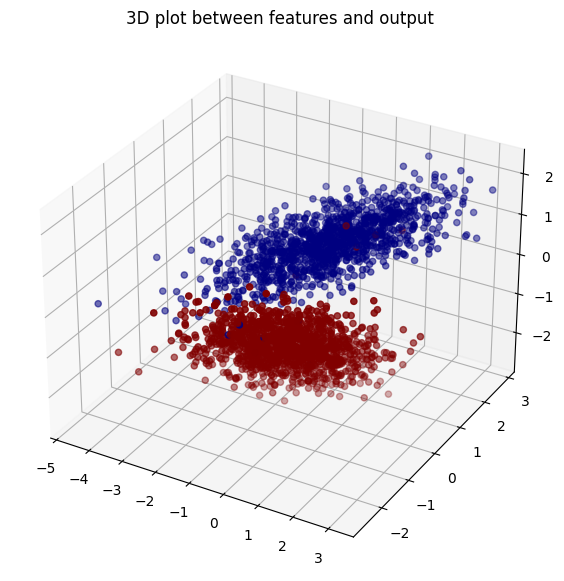

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection = "3d")

ax.scatter3D(X_train[:, 1], X_train[:, 0], X_train[:, 2] , c = Y_train, cmap= plt.cm.jet)
plt.title("3D plot between features and output")

# plt.scatter(X_train[:, 0], X_train[:, 2], c = Y_train, cmap= plt.cm.jet)
plt.show()

### Machine Learning Model

In [34]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def error(X, Y, theta):
    h = hypothesis(X, theta)
    positive = np.sum(Y * np.log(h))
    negative = np.sum((1 - Y) * np.log(1 - h))

    return -(positive + negative) / X.shape[0]

def gradient(X, Y, theta):
    h = hypothesis(X, theta)

    return np.dot(X.T, (h - Y)) / X.shape[0]

def gradient_descent(X, Y, learning_rate = 0.1, max_epochs = 300):
    theta = np.zeros(X.shape[1])
    theta = theta.reshape((-1, 1))

    error_list = []

    for i in range(max_epochs):
        error_list.append(error(X, Y, theta))

        theta = theta - (learning_rate * gradient(X, Y, theta))

    error_list = np.array(error_list)
    return theta, error_list

In [26]:
ones = np.ones((X_train.shape[0], 1))
X_new = np.hstack((ones, X_train))
Y_new = Y_train.reshape((-1, 1))

print(X_new.shape)
print(Y_new.shape)

(2400, 4)
(2400, 1)


In [35]:
theta, error_list = gradient_descent(X_new, Y_new)

In [36]:
print(theta)

[[-0.18887367]
 [-2.11278317]
 [ 1.05949161]
 [-2.04880995]]


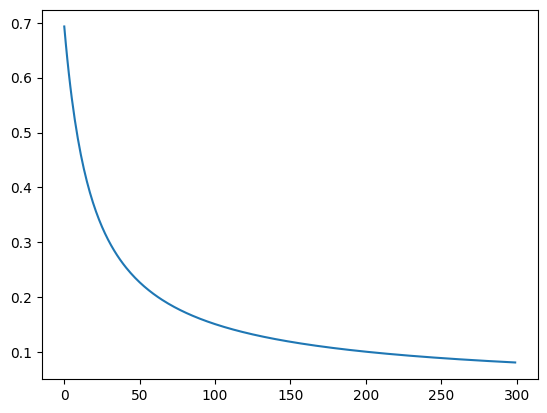

In [37]:
plt.plot(error_list)
plt.show()

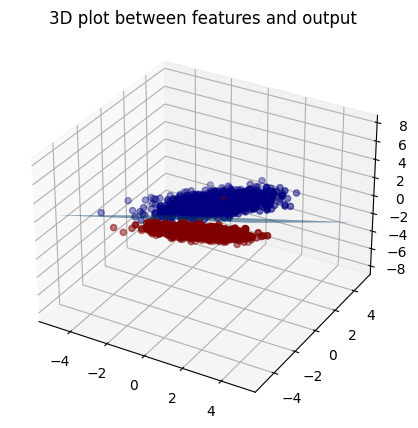

In [51]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection = "3d")

ax.scatter3D(X_train[:, 1], X_train[:, 0], X_train[:, 2] , c = Y_train, cmap= plt.cm.jet)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)
z_axis = - (theta[0] + theta[1] * y + theta[2] * x) / theta[3]
ax.plot_surface(x, y, z_axis, alpha = 0.7)
plt.title("3D plot between features and output")

# plt.scatter(X_train[:, 0], X_train[:, 2], c = Y_train, cmap= plt.cm.jet)
plt.show()

### Predictions and Accuracy

In [54]:
def predict(X, theta):
    h = hypothesis(X, theta)

    output = np.zeros(h.shape)

    output[h >= 0.5] = 1

    return output

def accuracy(actual, pred):
    actual = actual.astype('int')
    actual = actual.reshape((-1, 1))

    acc = np.sum(actual == pred) / actual.shape[0]

    return acc * 100

In [55]:
XT_pred = predict(X_new, theta)

print(accuracy(Y_train, XT_pred))

99.04166666666666


In [57]:
X_new_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

Xt_pred = predict(X_new_test, theta)

print(accuracy(Y_test, Xt_pred))

97.16666666666667
